In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
%autosave 60

Autosaving every 60 seconds


In [2]:
data=(np.loadtxt('../Codes/Ising_model/output.txt'))
E = data[:,0]

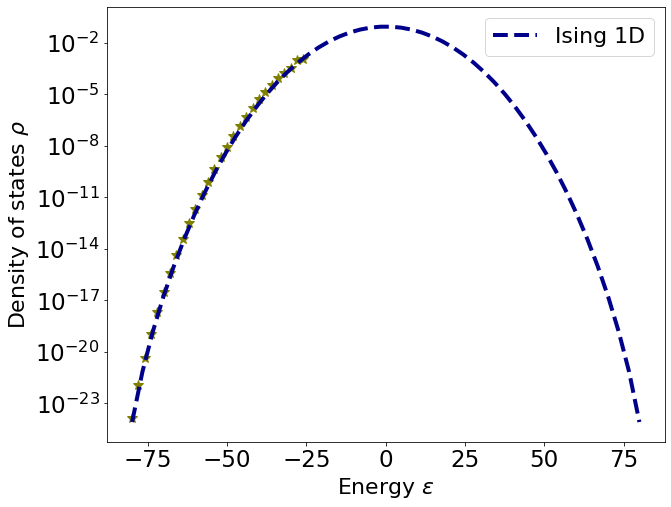

In [3]:
fig, ax = plt.subplots(figsize = (10,8))
L = 80
h = 20
ds = np.linspace(0, L );
data_E = np.histogram(E, bins = 'auto', density = True);
ax.plot(data_E[1][:-1], data_E[0]/(1e10*(2**(L))**(-1)*np.exp(-data_E[1][:-1]/1)), color = 'olive', linestyle = '', marker = '*', ms = 10);
#ax.plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);

#ax.plot(data_E[1][:-1], (2**(50))**(-1)*np.exp(-data_E[1][:-1]/1)*sc.comb(L, (data_E[1][:-1]+L)/2), color = 'olive', linestyle = '--', marker = '', ms = 10);
ax.plot(ds*2-L, sc.comb(L, ds)/2**(L) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');
ax.set_yscale('log');
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)
fig.savefig('../Figures/Density_of_States_MCMC_Ising1D_temperature.png')

In [4]:
print('%.2e'%(2**80),'%.2e'%(len(E)))

1.21e+24 8.00e+06


# MM Toy model

# $\rho = \binom{L}{k}(d-1)^k$

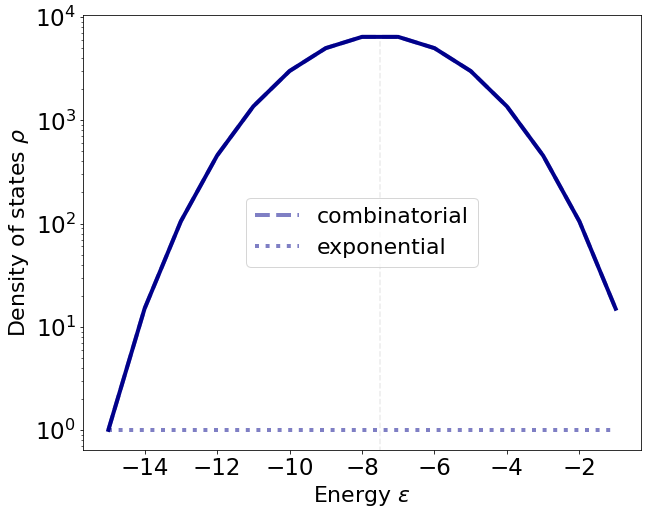

In [362]:
fig, ax = plt.subplots(figsize = (10,8))
L = 15 #Seq. lenght
d = 2 #Alphabet size
e0 = 1
k = np.arange(0,L)+0.001;
ax.plot(e0*(k-L), sc.comb(L, k) , linewidth = 4 , label = 'combinatorial', color = 'darkblue', linestyle = '--', alpha = .5);
ax.plot(e0*(k-L), (d-1)**k , linewidth = 4, label = 'exponential' , color = 'darkblue', linestyle = 'dotted', alpha = .5);
ax.plot(e0*(k-L), sc.comb(L, k)*(d-1)**k , linewidth = 4 , color = 'darkblue', linestyle = '-');
ax.vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')


ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)


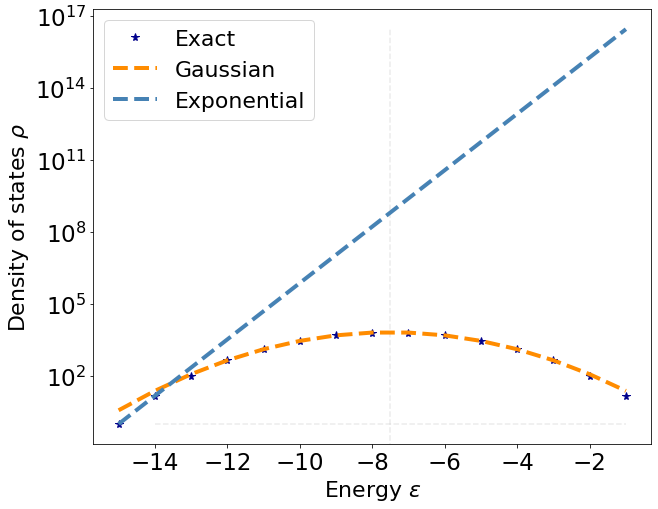

In [363]:
fig, ax = plt.subplots(figsize = (10,8))

def P0_gaussian(k, d, L):
    return d**L*np.exp(-0.5*((((d-1)*L)/d)-k)**2/(((d-1)/(d**2))*L))/(np.sqrt(2*np.pi*(((d-1)/(d**2))*L))) 
def P0(k, d, L):
    return np.exp(k*(np.log((L/1)*(d-1))))


ax.plot(e0*(k-L), sc.comb(L, k)*(d-1)**k , linewidth = 0 , label = 'Exact', color = 'darkblue', linestyle = '--', marker = '*', ms = 8);

ax.plot(e0*(k-L), P0_gaussian(k, d, L) , linewidth = 4 , label = 'Gaussian', color = 'darkorange', linestyle = '--');

#ax.plot(k, 1*np.exp((2-(4*0)/L)*k) , linewidth = 4 , label = 'Exponential gaussian', color = 'indigo', linestyle = '--');
ax.plot(e0*(k-L), P0(k, d, L) , linewidth = 4 , label = 'Exponential', color = 'steelblue', linestyle = '--');


ax.hlines((d-1)**L, -(L-1)*e0,-e0, linestyle = '--', alpha = .3, color = 'silver')
ax.vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')

ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)


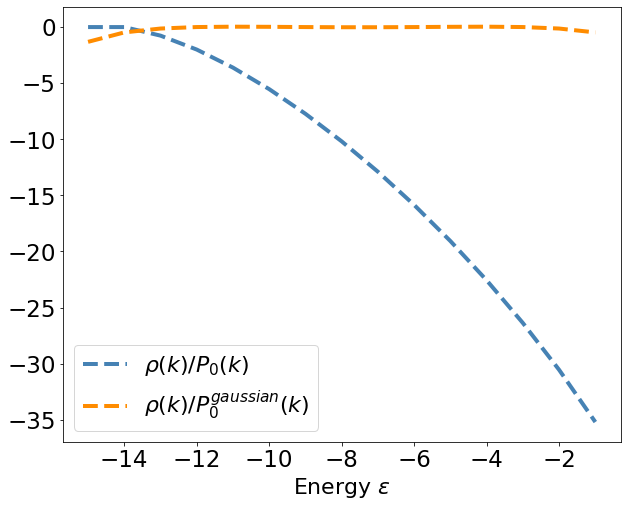

In [364]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(e0*(k-L), np.log((sc.comb(L, k)*(d-1)**k)/P0(k, d, L)), linewidth = 4 , label = r'$\rho(k)/P_0(k)$', color = 'steelblue', linestyle = '--');
ax.plot(e0*(k-L), np.log((sc.comb(L, k)*(d-1)**k)/P0_gaussian(k, d, L)), linewidth = 4 , label = r'$\rho(k)/P_0^{gaussian}(k)$', color = 'darkorange', linestyle = '--');


#ax.set_yscale('log')
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)




<ipython-input-365-092af89b548e>:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(e0*(k-L), (np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, k-1)*(d-1)**(k-1))) , linewidth = 4 , label = 'Exact', color = 'darkblue', linestyle = '', marker = '*', ms = 8);


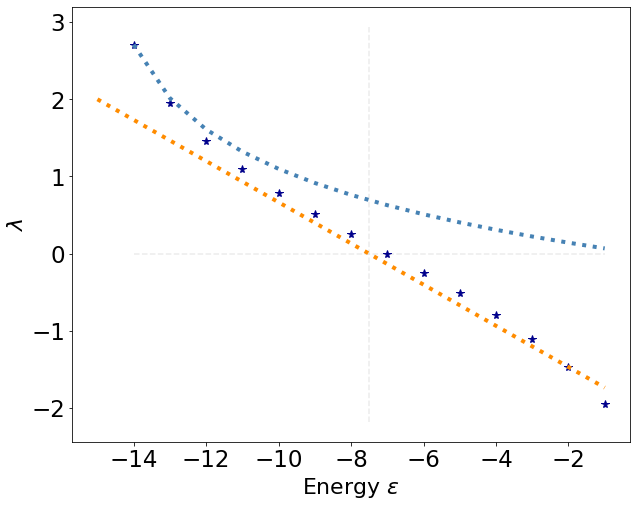

In [365]:
fig, ax = plt.subplots(figsize = (10,8))


ax.plot(e0*(k-L), (np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, k-1)*(d-1)**(k-1))) , linewidth = 4 , label = 'Exact', color = 'darkblue', linestyle = '', marker = '*', ms = 8);
#ax.plot(e0*(k-L), (4*((d-1)/d) - (4*k)/(L)), linewidth = 4 , label = 'Gaussian 2', color = 'darkorange', linestyle = '--');

ax.plot(e0*(k-L), (d - (k)/(((1/d)-(1/d**2))*L)), linewidth = 4 , label = 'Gaussian 2', color = 'darkorange', linestyle = ':');


ax.plot(e0*(k[1:]-L), np.ones_like(k[1:])*np.log((L/(k[1:]))*(d-1)), linewidth = 4 , label = 'Exponential 2', color = 'steelblue', linestyle = ':');

ax.hlines(0, -(L-1)*e0,-e0, linestyle = '--', alpha = .3, color = 'silver')
ax.vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')


#ax.set_ylim(bottom = 0);
#ax.set_xlim(left = 0, right = 15);
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'$\lambda$', fontsize = 22)
ax.tick_params(labelsize = 23)
#ax.legend(loc = 0, fontsize = 22)



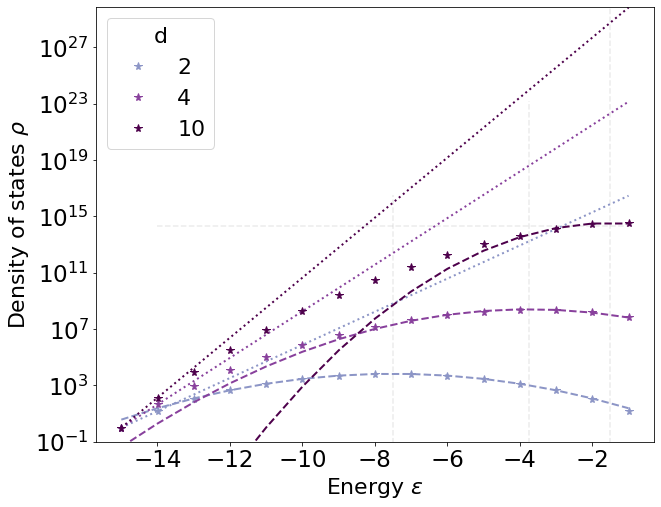

In [366]:
fig, ax = plt.subplots(figsize = (10,8))

ds = [2, 4, 10]
colors = plt.cm.BuPu(np.linspace(0,1,len(ds)+2))

for i, d in enumerate(ds):
    ax.plot(e0*(k-L), sc.comb(L, k)*(d-1)**k , linewidth = 0 , label = '%.d'%d, color = colors[i+2], linestyle = '--', marker = '*', ms = 8);
    ax.plot(e0*(k-L), P0_gaussian(k, d, L) , linewidth = 2 , color = colors[i+2], linestyle = '--');
    #ax.plot(k, 1*np.exp((2-(4*0)/L)*k) , linewidth = 4 , label = 'Exponential gaussian', color = 'indigo', linestyle = '--');
    ax.plot(e0*(k-L), P0(k, d, L) , linewidth = 2 ,color = colors[i+2], linestyle = ':');
    
    ax.vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')
    

ax.hlines((d-1)**L, -(L-1)*e0,-e0, linestyle = '--', alpha = .3, color = 'silver')

ax.set_ylim(bottom=1e-1)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22, title = 'd', title_fontsize = 22)



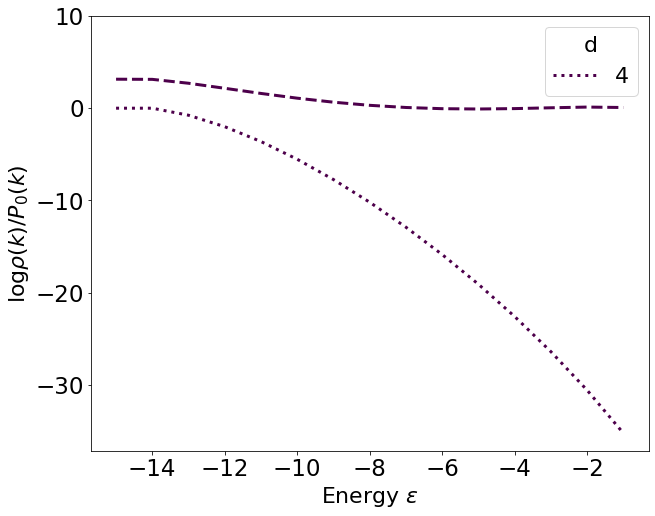

In [367]:
fig, ax = plt.subplots(figsize = (10,8))

ds = [4]
colors = plt.cm.BuPu(np.linspace(0,1,len(ds)+2))

for i, d in enumerate(ds):
    ax.plot(e0*(k-L), np.log((sc.comb(L, k)*(d-1)**k)/P0(k, d, L)), linewidth = 3 , label ='%.d'%d , color = colors[i+2], linestyle = ':');
    ax.plot(e0*(k-L), np.log((sc.comb(L, k)*(d-1)**k)/P0_gaussian(k, d, L)), linewidth = 3, color = colors[i+2], linestyle = '--');

#ax.hlines((d-1)**L, -(L-1)*e0, -e0, linestyle = '--', alpha = .3, color = 'silver')

ax.set_ylim(top=10)
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'$\log{\rho(k)/P_0(k)}$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22, title = 'd', title_fontsize = 22)




<ipython-input-375-4b570f627cee>:7: RuntimeWarning: divide by zero encountered in log
  ax.plot(e0*(k-L), (np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, (k-1))*(d-1)**(k-1))) , linewidth = 4 , label = '%.d'%d, color = colors[i+2], linestyle = '', marker = '*', ms = 8);
<ipython-input-375-4b570f627cee>:7: RuntimeWarning: divide by zero encountered in log
  ax.plot(e0*(k-L), (np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, (k-1))*(d-1)**(k-1))) , linewidth = 4 , label = '%.d'%d, color = colors[i+2], linestyle = '', marker = '*', ms = 8);
<ipython-input-375-4b570f627cee>:7: RuntimeWarning: divide by zero encountered in log
  ax.plot(e0*(k-L), (np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, (k-1))*(d-1)**(k-1))) , linewidth = 4 , label = '%.d'%d, color = colors[i+2], linestyle = '', marker = '*', ms = 8);


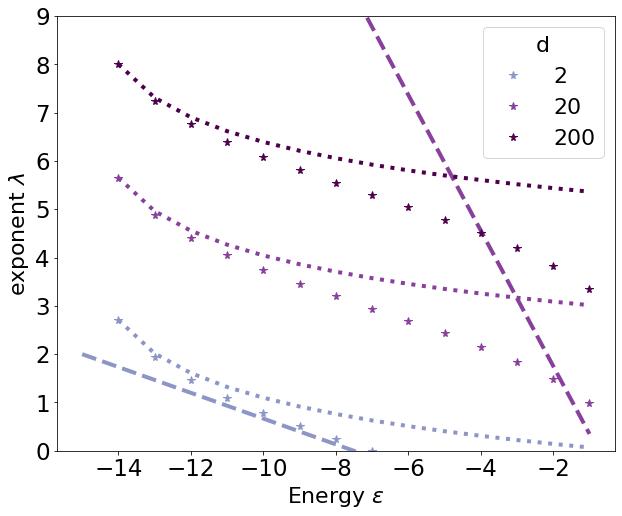

In [375]:
fig, ax = plt.subplots(figsize = (10,8))

ds = [2, 20, 200]
colors = plt.cm.BuPu(np.linspace(0,1,len(ds)+2))

for i, d in enumerate(ds):
    ax.plot(e0*(k-L), (np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, (k-1))*(d-1)**(k-1))) , linewidth = 4 , label = '%.d'%d, color = colors[i+2], linestyle = '', marker = '*', ms = 8);
    #ax.plot(e0*(k-L), (4*((d-1)/d) - (4*k)/(L)), linewidth = 4 , label = 'Gaussian 2', color = 'darkorange', linestyle = '--');
    ax.plot(e0*(k-L), (d - (k)/(((1/d)-(1/d**2))*L)), linewidth = 4 ,  color = colors[i+2], linestyle = '--');
    ax.plot(e0*(k[1:]-L), np.ones_like(k[1:])*np.log((L/k[1:])*(d-1)), linewidth = 4 , color = colors[i+2], linestyle = ':');

ax.set_ylim(top=9, bottom = 0)
ax.set_xlabel(r'Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'exponent $\lambda$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22, title = 'd', title_fontsize = 22)


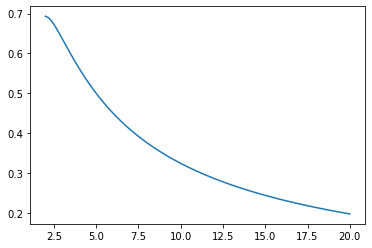

In [357]:
L = 5
ds = np.linspace(2,20,100)
plt.plot(ds, np.log(ds/(ds-1)) + np.log(ds-1)/ds)


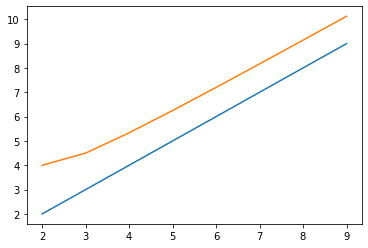

In [287]:
ds = np.arange(2, 10)
plt.plot(ds, ds)
plt.plot(ds, 10/(L*((1/ds)-(1/ds**2))))

In [46]:
(d**L)*0.00001

10737.41824

-11.25 344551.8961378237


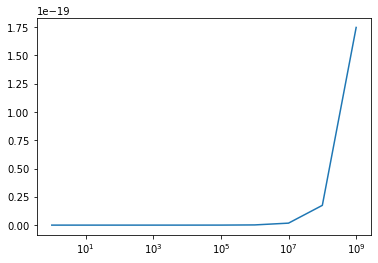

In [44]:
d = 4
e0=3
A = np.logspace(0, 9, 10)
E=-(e0*L)/d
kd = np.exp(E + 8*e0)
plt.plot(A, (A*6.02214076e-23)/((A*6.02214076e-23)+(kd)))
plt.xscale('log')
print(E,kd)


In [36]:
a = np.random.randint(low = 0, high=d, size=4*L).reshape(4, L) 
a

array([[18, 12,  3, 16,  0,  3,  1,  1,  6, 12],
       [ 9,  0,  1,  4,  2,  3,  3, 19, 18, 15],
       [15, 10, 15, 10, 18, 14, 19, 11,  1,  7],
       [ 4, 19, 16,  3, 17,  4,  1,  7, 13, 15]])

In [37]:
a = np.delete(a, 1, 0)
a

array([[18, 12,  3, 16,  0,  3,  1,  1,  6, 12],
       [15, 10, 15, 10, 18, 14, 19, 11,  1,  7],
       [ 4, 19, 16,  3, 17,  4,  1,  7, 13, 15]])

In [85]:
d = 20
L = 10
N = 10000
E_matrix = np.diag(-e0*np.ones(d))
antigen = np.random.randint(low = 0, high=d, size=L)
energies = np.zeros(N)
Bcells_to_delete = np.array([], dtype = int)
print(-e0*L/d)

-2.0


In [86]:
%%time
B_cells_seqs = np.random.randint(low = 0, high=d, size=N*L).reshape(N, L) 
for i in np.arange(N):
    energies[i] = np.sum(E_matrix[antigen, B_cells_seqs[i,:]])
    if energies[i]<= -e0*L/d:
        Bcells_to_delete = np.append(Bcells_to_delete, int(i))
        
Bcells_to_delete
np.shape(B_cells_seqs)

CPU times: user 90.8 ms, sys: 1.83 ms, total: 92.7 ms
Wall time: 91.1 ms


(10000, 10)

In [87]:
B_cells_seqs = np.delete(B_cells_seqs, Bcells_to_delete, 0)


In [88]:
np.shape(B_cells_seqs)

(5964, 10)